# Data Preparation
read Quran as a list of Verses (lines)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function, division
from scipy import stats

# use seaborn plotting style defaults
import seaborn as sns; sns.set()

file = open('quran.txt', 'r', encoding='utf-8')
VerseList = file.readlines()
file.close()

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [ ]:
# for vr in VerseList:
#     print(vr)

## create sura array to store the surat number
## And also the group

In [2]:
i=0
sura= np.arange(6236)
sura[0]=1

for vr in VerseList:
    if (i): sura[i]= int(vr.split(chr(124),1)[0])
    i+=1
    
# this gives how many occurences of the number in the list (which is the length of the specific sura- number of ayats)    
list(sura).count(113)

group= np.arange(6236)
for i in range(6236):
    if (sura[i] ==1): group[i] = 0
    if (sura[i] in range(2,5)): group[i] = 1
    if (sura[i] in range(5,10)): group[i] = 2
    if (sura[i] in range(10,17)): group[i] = 3
    if (sura[i] in range(17,26)): group[i] = 4
    if (sura[i] in range(26,37)): group[i] = 5
    if (sura[i] in range(37,50)): group[i] = 6
    if (sura[i] in range(50,115)): group[i] = 7
                    
        
group.shape

    

(6236,)

In [27]:
sura

array([  1,   1,   1, ..., 114, 114, 114])

In [28]:
group

array([0, 0, 0, ..., 7, 7, 7])

In [3]:
# this function returns the length of sura
def suraLen(sr):
 return list(sura).count(sr)

suraLen(1)



7

In [4]:
#  read Quran as a single string
file = open('quran.txt', 'r', encoding='utf-8')
QuranStr = file.read().replace('\n', '')
file.close()
#delete the first five elements (just unreadable characters): 



In [ ]:
# print the Quran as a single string
QuranStr[5:500]

read the file 'AlphabetCode' : The file provides a corresponding latin letter to phonetically close arabic letter. Just in case there is a need for it.

create a property file : key (code for the arabic letter), value(arabic letter)

In [32]:
# use strip to get rid off \n
LetterCode = [line.strip() for line in open("AlphabetCode.txt", 'r', encoding='utf-8' )]
# split the list rows to 2 columns

for i in range(len(LetterCode)):
    LetterCode[i] = LetterCode[i].split()

print(LetterCode)
#first element to integer    
for i in range(len(LetterCode)):
    LetterCode[i][0] = int(LetterCode[i][0])
    
print("-----------------------------------------------------------------------------")
print("")
print(LetterCode)
    

[['1569', 'a'], ['1570', 'a'], ['1571', 'a'], ['1572', 'a'], ['1573', 'a'], ['1574', 'a'], ['1575', 'A'], ['1576', 'b'], ['1577', 't'], ['1578', 't'], ['1579', 'F'], ['1580', 'g'], ['1581', 'H'], ['1582', 'K'], ['1583', 'd'], ['1584', 'D'], ['1585', 'r'], ['1586', 'z'], ['1587', 's'], ['1588', 'S'], ['1589', 'c'], ['1590', 'x'], ['1591', 'T'], ['1592', 'X'], ['1593', 'A'], ['1594', 'R'], ['1601', 'f'], ['1602', 'q'], ['1603', 'k'], ['1604', 'l'], ['1605', 'm'], ['1606', 'n'], ['1607', 'h'], ['1608', 'w'], ['1609', 'A'], ['1610', 'y']]
-----------------------------------------------------------------------------

[[1569, 'a'], [1570, 'a'], [1571, 'a'], [1572, 'a'], [1573, 'a'], [1574, 'a'], [1575, 'A'], [1576, 'b'], [1577, 't'], [1578, 't'], [1579, 'F'], [1580, 'g'], [1581, 'H'], [1582, 'K'], [1583, 'd'], [1584, 'D'], [1585, 'r'], [1586, 'z'], [1587, 's'], [1588, 'S'], [1589, 'c'], [1590, 'x'], [1591, 'T'], [1592, 'X'], [1593, 'A'], [1594, 'R'], [1601, 'f'], [1602, 'q'], [1603, 'k'], [1

In [33]:
for i in range(len(LetterCode)):
    print(str(LetterCode[i][0]) + " " + LetterCode[i][1] + " " + chr(LetterCode[i][0]))   # chr transform code to arabic letter.
                                                                                          # using utf-8
    

1569 a ء
1570 a آ
1571 a أ
1572 a ؤ
1573 a إ
1574 a ئ
1575 A ا
1576 b ب
1577 t ة
1578 t ت
1579 F ث
1580 g ج
1581 H ح
1582 K خ
1583 d د
1584 D ذ
1585 r ر
1586 z ز
1587 s س
1588 S ش
1589 c ص
1590 x ض
1591 T ط
1592 X ظ
1593 A ع
1594 R غ
1601 f ف
1602 q ق
1603 k ك
1604 l ل
1605 m م
1606 n ن
1607 h ه
1608 w و
1609 A ى
1610 y ي


In [13]:
#create a comprehension list comprising arabic letters code
# from 1569 to 1595 and then from 1601 to 1611  (1569,1570,...,1595, 1601,1602,...,1611)
ArabicCodeRange= [x for x in range(1569,1595)] + [x for x in range(1601,1611)]
ArabicCodeRange


[1569,
 1570,
 1571,
 1572,
 1573,
 1574,
 1575,
 1576,
 1577,
 1578,
 1579,
 1580,
 1581,
 1582,
 1583,
 1584,
 1585,
 1586,
 1587,
 1588,
 1589,
 1590,
 1591,
 1592,
 1593,
 1594,
 1601,
 1602,
 1603,
 1604,
 1605,
 1606,
 1607,
 1608,
 1609,
 1610]

## length of a verse (exclude short vowels)

In [34]:

v=777
print(VerseList[v])

# leng function returns the real length of arabic string, excluding the short vowels...
def leng(line):
    l=0
    for c in range(len(line)):
        if (ord(line[c])) in ArabicCodeRange: 
            l=l+1
    return l        
        
print (leng(VerseList[v]))



5|109|يَوْمَ يَجْمَعُ اللَّهُ الرُّسُلَ فَيَقُولُ مَاذَا أُجِبْتُمْ قَالُوا لَا عِلْمَ لَنَا إِنَّكَ أَنْتَ عَلَّامُ الْغُيُوبِ

59


## Create the frequency of letters of each verse of the quran

In [45]:

LetterFrequency = np.array([[0 for j in range(36)] for i in range(6236)])

for row in range(6236):
    for col in range(36):
        LetterFrequency[row][col]=VerseList[row].count(chr(LetterCode[col][0]))
        #print(str(LetterFrequency[row][col]) + " " + chr(LetterCode[col][0]))
    
print(LetterFrequency[0])

[0 0 0 0 0 0 3 1 0 0 0 0 2 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 4 3 1 1 0 0 1]


## Print the verse and its corresponding frequency of letters

In [44]:

v=1

print(VerseList[v])            
print ("The length of the verse is (nbr of letters): " + str( leng(VerseList[v]) ) )
print ("The sum of all letters frequency:            " + str(sum(LetterFrequency[v])))

print(" ")
for col in range(36):
    print("i"+chr(LetterCode[col][0]), end=' ')
    
print(" ")
for col in range(36):
    print(str(LetterFrequency[v][col]), end='  ')



print(" ")       
print(chr(LetterCode[13][0]))  

1|2|الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ

The length of the verse is (nbr of letters): 18
The sum of all letters frequency:            18
 
iء iآ iأ iؤ iإ iئ iا iب iة iت iث iج iح iخ iد iذ iر iز iس iش iص iض iط iظ iع iغ iف iق iك iل iم iن iه iو iى iي  
0  0  0  0  0  0  3  1  0  0  0  0  1  0  1  0  1  0  0  0  0  0  0  0  1  0  0  0  0  5  2  1  1  0  0  1   
خ


## Make a copy of LetterFrequency array

In [16]:
import copy
LetterFrequency2 = copy.deepcopy(LetterFrequency)
LetterCode2 = copy.deepcopy(LetterCode)

LetterFrequency2.shape

(6236, 36)

## Sum up all types of hamza and put them in one column and delete the other columns
## Do the same for 2 types of taa

In [17]:

#sum up the alif, hamza, and taa
for row in range(6236):
        LetterFrequency2[row][6]= LetterFrequency2[row][6] + LetterFrequency2[row][34]  # alif and alif maksoura
        LetterFrequency2[row][8]= sum(LetterFrequency2[row][8:10]) # taa marbouta and maftouha
        LetterFrequency2[row][0]= sum(LetterFrequency2[row][:6])# Hamza
        
print(LetterFrequency2.shape)

LetterFrequency2=np.delete(LetterFrequency2,34,1)   # col=34, axis =1
LetterFrequency2=np.delete(LetterFrequency2,9,1) #col=9, axis =1
LetterFrequency2=np.delete(LetterFrequency2,[range(1,6)],1)  #col= 1 to 5, axis =1

print(LetterFrequency2.shape)

#delete the columns from lettercode corresponding to the coulumns deleted from LetterFrequency
del LetterCode2[34]
del LetterCode2[9]
del LetterCode2[1:6]
        

(6236, 36)
(6236, 29)


## Create an array for Arabic Letters

In [18]:
# create an np array for arabic letters codes
arabLetterCodes = np.arange(29)

for i in range(29):
    arabLetterCodes[i]= int(LetterCode2[i][0])
    print(chr(arabLetterCodes[i]))
    
arabLetters = np.chararray(29, unicode=True)

for i in range(29):
#     print(chr(arabLetterCodes[i]))
    arabLetters[i]= chr(arabLetterCodes[i])

arabLetters
              

ء
ا
ب
ة
ث
ج
ح
خ
د
ذ
ر
ز
س
ش
ص
ض
ط
ظ
ع
غ
ف
ق
ك
ل
م
ن
ه
و
ي


chararray(['ء', 'ا', 'ب', 'ة', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س',
       'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن',
       'ه', 'و', 'ي'], 
      dtype='<U1')

In [20]:
np.save('Arabletters.npy', arabLetters)

In [21]:
#print a table of the first 70 vectors of letters frequencies
for row in range(70):
    for col in range(29):
        if (LetterFrequency2[row][col]): print(LetterFrequency2[row][col], end=' ')
        else: print(".", end=' ') # replace zeros by a dot
    print(" ")

. 3 1 . . . 2 . . . 2 . 1 . . . . . . . . . . 4 3 1 1 . 1  
. 3 1 . . . 1 . 1 . 1 . . . . . . . 1 . . . . 5 2 1 1 . 1  
. 2 . . . . 2 . . . 2 . . . . . . . . . . . . 2 2 1 . . 1  
. 2 . . . . . . 1 . . . . . . . . . . . . . 1 2 2 1 . 1 2  
2 2 1 1 . . . . 1 . . . 1 . . . . . 2 . . . 2 . . 3 . 1 3  
. 5 . 1 . . . . 1 . 1 . 1 . 1 . 1 . . . . 1 . 2 2 1 1 . 1  
1 6 1 1 . . . . . 1 2 . . . 1 2 1 . 3 2 . . . 7 4 3 2 2 5  
. 4 1 . . . 2 . . . 2 . 1 . . . . . . . . . . 5 4 1 1 . 1  
. 4 2 2 . . . . 1 1 1 . . . . . . . . . 1 1 2 5 1 1 2 . 3  
1 6 2 1 . . . . . 1 1 1 . . 1 . . . . 1 1 3 . 4 5 7 1 5 6  
5 4 3 1 . . . 1 . 1 1 2 . . . . . . . . . 2 2 6 5 8 1 6 4  
4 3 1 . . . 1 . 1 . 1 . . . . . . . 1 . 1 . 2 5 4 2 3 4 .  
6 4 . 2 . . . . . 3 3 . 1 . . . . . 1 . 1 . 1 4 6 6 3 3 3  
1 7 3 2 . . . 1 . 1 1 . 1 1 1 . . 1 6 1 . 1 . 7 7 . 5 5 1  
3 7 3 . . . . 1 . . 1 . 1 . . . . . . . . 1 . 6 8 6 2 5 3  
3 7 . . . . . 2 2 1 1 . 1 1 . . . . 3 . 1 . . 4 4 6 2 7 4  
1 7 4 . . . . . 1 2 2 1 . . . 2 . . 1 . 

In [22]:
#print the verse given its index and the corresponding letter frequency vectors

v=3469

print(VerseList[v])            
print (leng(VerseList[v]))
print(sum(LetterFrequency[v]))

for col in range(29):
    print("i"+chr(LetterCode2[col][0]), end=' ') 
print(" ")
print(" ", end='')
for col in range(29):
    print(str(LetterFrequency2[v][col]), end='  ') 
    
print(" ")
print("-------------- ")
print(LetterFrequency2[v])

    

31|1|بِسْمِ اللَّهِ الرَّحْمَنِ الرَّحِيمِ الم

22
22
iء iا iب iة iث iج iح iخ iد iذ iر iز iس iش iص iض iط iظ iع iغ iف iق iك iل iم iن iه iو iي  
 0  4  1  0  0  0  2  0  0  0  2  0  1  0  0  0  0  0  0  0  0  0  0  5  4  1  1  0  1   
-------------- 
[0 4 1 0 0 0 2 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 5 4 1 1 0 1]


168.0


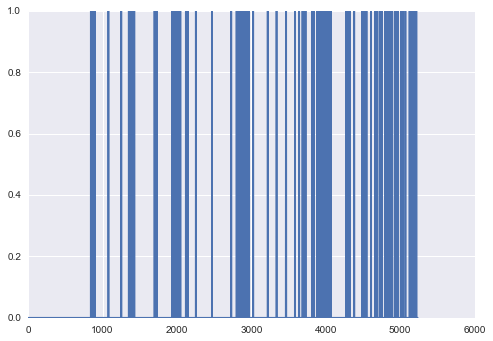

In [23]:
# 168 verses have a length of 19 letters like bismiAllah
index=0
nineteen = np.zeros(6236)
for row in range(6235):
    if (sum(LetterFrequency2[row])==19):
        nineteen[row]=1
        index+=1
#         print(row,VerseList[row])
        
print(sum(nineteen))

plt.plot(nineteen[1000:6236])

# alif and hamza ?

## Function to calculate angles

In [24]:

def angle(x,y):
    if (len(x)!=len(y)):
        return "vectors are not the same dimension"
    dot = np.dot(x,y)
    x_modulus = np.sqrt((x*x).sum())
    y_modulus = np.sqrt((y*y).sum())
    cos_angle = dot / x_modulus / y_modulus # cosine of angle between x and y
    angle = np.arccos(cos_angle)
    degreeAngle=angle * 360 / 2 / np.pi # angle in degrees
    if degreeAngle < 1e-5:
        return 0
    return round(degreeAngle)

# a = np.array([1,0])
# b = np.array([0.5,1])
# print(angle(a,a))



# calculate the angle between a specific verse a and all other vectors and store it in angles
a= np.array(LetterFrequency2[0])

angles= np.array([i for i in range(6236)])


    
    



# Compute angles

In [25]:
k=0
for row in range(6236):
    #a= np.array(LetterFrequency2[row])
    b= np.array(LetterFrequency2[row])
    #print(angle(a,b))
    #angles[row] = 90-angle(a,b)
    if (row==k):
        angles[row] = 90
    else:
        angles[row] = 90-angle(LetterFrequency2[k],LetterFrequency2[row])

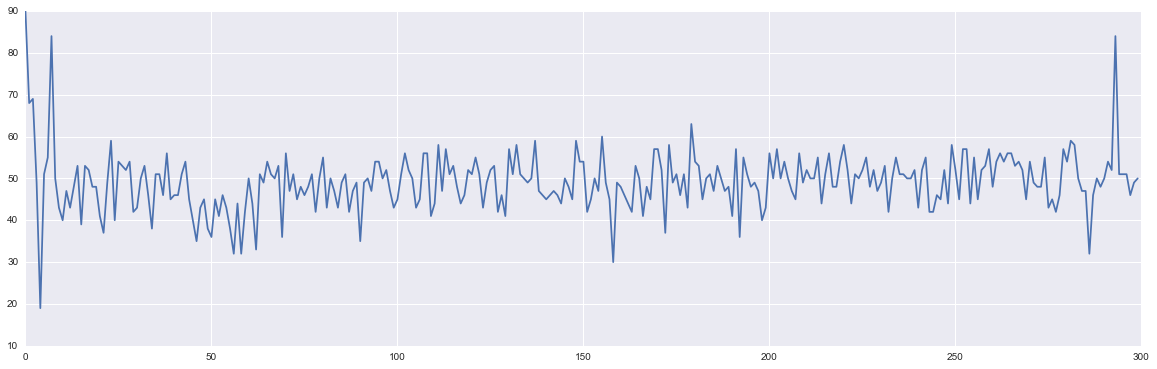

In [26]:

plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plt.xlim(0,300)
index=0
minAngles= np.array(range(6236))
equals = np.array(range(100))

for i in range(6236):
    if (angles[i] > 65):
        minAngles[index]=angles[i]
        equals[index]=i
        index+=1
#         print(i,angles[i],VerseList[i])
        print
        
# x=np.array(range(index))
plt.plot(angles[0:300])
# plt.plot(equals[0:index])
# plt.plot(x,x*x*6)

## Regression


In [ ]:
# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression

## Normalize data

In [ ]:
#normalize data
qdata = copy.deepcopy(LetterFrequency2)
qdata = qdata.astype(float)
type(qdata)
nqdata = copy.deepcopy(qdata)

for row in range(6236):
#         if (qdata[row,col]!=0):
        nqdata[row] = qdata[row]/np.linalg.norm(qdata[row]) 
            
for row in range(10):
    for col in range(29):
         print (round(qdata[row,col],2), end=' ')
    print(" ")



In [ ]:

# create X and y
# 1,83,  23,80   24,72   

targetLetter = 1

X = np.delete(qdata,targetLetter,1)  #delete coulmn n=targetLetter, axis=1
y = qdata[:,targetLetter]            # y is column n=targetLetter

print(X.shape,y.shape)



lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
# print (lm.intercept_)
print (lm.coef_*10)
lm.score(X, y)

In [ ]:
# print (lm.intercept_)
# print (lm.coef_)
# plt.plot(lm.coef_)
txt="   "
for i in range(29):
    print(i,chr(arabLetterCodes[i]), txt, round(lm.coef_[i-1]*100))
    
plt.plot((lm.coef_*100))


## PCA

## 2d plots between two letters 

In [ ]:
# plot alif and lam,the plot shows that there is a correlation between these 2 letters which is obvious
plt.plot(qdata[:, 1], qdata[:, 23], 'o')




In [ ]:
from mpl_toolkits.mplot3d import Axes3D





(6236, 29)
(6236, 2)
26


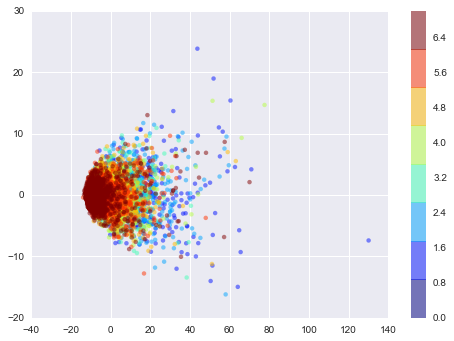

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # project from 29 to 2 dimensions
# pca.fit(qdata)

# print(pca.explained_variance_)
# print(pca.components_.shape)


qdata2 = copy.deepcopy(qdata)


qdataProj = pca.fit_transform(qdata2)
print(qdata2.shape)
print(qdataProj.shape)
print(sura[3000])

plt.scatter(qdataProj[:, 0], qdataProj[:, 1], c=group, edgecolor='none', cmap=plt.cm.get_cmap('jet', 8), alpha=0.5)
plt.colorbar();

In [ ]:
sum(group==1)

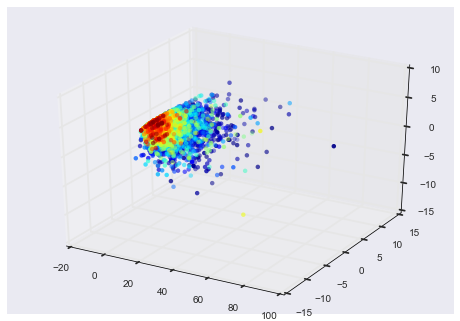

In [81]:


qdata3 = copy.deepcopy(qdata)

pca3 = PCA(n_components=3) # project from 29 to 3 dimensions
qdataProj3 = pca3.fit_transform(qdata3[:,[1,10,23]])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(qdataProj3[:, 0], qdataProj3[:, 1],qdataProj3[:, 2],c=sura, edgecolor='none', 
           cmap=plt.cm.get_cmap('jet'))


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(qdataProj3[:, 0], qdataProj3[:, 1], qdataProj3[:, 2],c=sura, edgecolor='none'
           , cmap=plt.cm.get_cmap('jet'))

# ax.view_init(elev=20, azim=150)
# fig.savefig("picture.png", bbox_inches='tight')



## Save the plot into a file for animation

In [ ]:

# for az in range(85,185,5):
#     ax.view_init(elev=20, azim=az)
#     fname="C:\\Users\\Rachid\\Desktop\\Quran\\Album\\picture" + str(az) +".png"
#     fig.savefig(fname, bbox_inches='tight')

## Save The Data

In [ ]:
# for az in range(360):   
#     ax.view_init(elev=20, azim=az)
#     filename="normala"+str(az)+".png"
#     fig.savefig(filename, bbox_inches='tight')

# np.savetxt("foo.csv", qdata, delimiter=",")

from tempfile import TemporaryFile
outfile = TemporaryFile()

np.save('qdata.npy', qdata)
np.save('nqdata.npy', nqdata)



# outfile.seek(0) # Only needed here to simulate closing & reopening file
# np.load(outfile)



    
    
    